In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import zscore

In [2]:
df = pd.read_csv('data.csv', index_col=0)
df = df.drop(columns=['Unnamed: 32'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Use radius_mean and concavity_worst as features

In [3]:
# Change diagnosis 'M' to 1, 'B' to 0
df['diagnosis_bool'] = df.diagnosis.map({'M': 1, 'B': 0})

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_bool
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [4]:
X = df[['radius_mean', 'concavity_worst']]
y = df.diagnosis_bool

In [5]:
X_norm = zscore(X)
X_norm.head()

,radius_mean,concavity_worst
id,,
842302,1.097064,2.109526
842517,1.829821,-0.146749
84300903,1.579888,0.854974
84348301,-0.768909,1.989588
84358402,1.750297,0.613179


In [6]:
from utils_logistic_reg import fit, train_test_split, optimize_lambda, determine_optimal_iterations

In [7]:
# Split training from testing data
X_train, X_test, y_train, y_test = train_test_split(X=X_norm, y=y, train_size=0.8, random_state=1, shuffle=True)

Lambda: 0.0001 | Avg Log Loss: 0.4353
Lambda: 0.0001 | Avg Log Loss: 0.4353
Lambda: 0.0002 | Avg Log Loss: 0.4353
Lambda: 0.0003 | Avg Log Loss: 0.4353
Lambda: 0.0004 | Avg Log Loss: 0.4353
Lambda: 0.0007 | Avg Log Loss: 0.4353
Lambda: 0.0010 | Avg Log Loss: 0.4353
Lambda: 0.0014 | Avg Log Loss: 0.4353
Lambda: 0.0020 | Avg Log Loss: 0.4353
Lambda: 0.0029 | Avg Log Loss: 0.4353
Lambda: 0.0043 | Avg Log Loss: 0.4353
Lambda: 0.0063 | Avg Log Loss: 0.4353
Lambda: 0.0091 | Avg Log Loss: 0.4353
Lambda: 0.0133 | Avg Log Loss: 0.4353
Lambda: 0.0193 | Avg Log Loss: 0.4353
Lambda: 0.0281 | Avg Log Loss: 0.4353
Lambda: 0.0409 | Avg Log Loss: 0.4353
Lambda: 0.0596 | Avg Log Loss: 0.4353
Lambda: 0.0869 | Avg Log Loss: 0.4353
Lambda: 0.1265 | Avg Log Loss: 0.4353
Lambda: 0.1842 | Avg Log Loss: 0.4353
Lambda: 0.2683 | Avg Log Loss: 0.4353
Lambda: 0.3907 | Avg Log Loss: 0.4354
Lambda: 0.5690 | Avg Log Loss: 0.4354
Lambda: 0.8286 | Avg Log Loss: 0.4354
Lambda: 1.2068 | Avg Log Loss: 0.4354
Lambda: 1.75

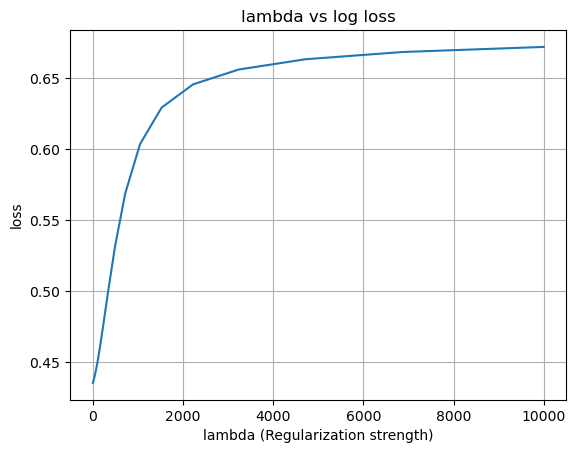

'Best lambda: 0.0001, Average validation Error: 0.4353198205843075'

In [8]:
# Determine optimal lambda
lambda_range = np.logspace(-4, 4, 50)
optimize_lambda(lambda_range, X_train, y_train, learning_rate=0.001, no_iterations=1000, n_splits=5, random_state=1, show_loss_plot=True, log_scale=False)


np.logspace(-4, -1, 50), Best lambda = 0.0001-> average validation error: 0.4234 <br>
np.linspace(0.00001, 0.001, 50), Best lambda = 0.001 -> average validation error: same as above

In [10]:
best_lambda = 0.0001
# Fit to entire train set
iterations = np.linspace(1000, 10000, num=10, dtype='int64')

determine_optimal_iterations(iterations=iterations, X=X_train, y=y_train, _lambda=best_lambda, show_plot=True)

TypeError: fit() got multiple values for argument 'learning_rate'